In [ ]:
import pandas as pd
import numpy as np

In [ ]:
PATH = r'../nnn/nnn.csv'
df2 = pd.read_csv( PATH , delimiter= ',')

In [ ]:
# 1 to 1 CCc calculation

df = df2.dropna(subset=['arousal_clip'])

y_true = df['true'] 
y_pred = df['prediction']

cor = np.corrcoef(y_true, y_pred)[0][1]
# Means
mean_true = np.mean(y_true)
mean_pred = np.mean(y_pred)
# Population variances
var_true = np.var(y_true)
var_pred = np.var(y_pred)
# Population standard deviations
sd_true = np.std(y_true)
sd_pred = np.std(y_pred)
# Calculate CCC
numerator = 2 * cor * sd_true * sd_pred
denominator = var_true + var_pred + (mean_true - mean_pred)**2
ccc = numerator / denominator
print(ccc)


0.610148974812669


In [ ]:
df.columns

Index(['image', 'val_bin', 'aro_bin', '05', '1041', '118', '13', '1969', '28',
       '35', '353', '420', '44', '466', '58', '67', '702', '74', '85', '92',
       'biggest_gap', 'mean', 'std'],
      dtype='object')

In [ ]:
columns = [ '05', '1041', '118', '13', '1969', '28',
       '35', '353', '420', '44', '466', '58', '67', '702', '74', '85', '92',  ]

In [ ]:
# 1 to 1 CCC 
# eg. AffectNet <> 1 model, AffectNet <> 1 person 

r = 17
s = []
for j in range(0,r):

    df = df2.dropna(subset=[columns[j]])

    y_true = df['arousal'] 
    y_pred = df[columns[j]]
    print(columns[j])

    cor = np.corrcoef(y_true, y_pred)[0][1]
# Means
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    # Population variances
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    # Population standard deviations
    sd_true = np.std(y_true)
    sd_pred = np.std(y_pred)
    # Calculate CCC
    numerator = 2 * cor * sd_true * sd_pred
    denominator = var_true + var_pred + (mean_true - mean_pred)**2
    ccc = numerator / denominator
       
    
    s.append(ccc)
    print(s,ccc)


05
[0.6067401427142378] 0.6067401427142378
1041
[0.6067401427142378, 0.6871370569816004] 0.6871370569816004
118
[0.6067401427142378, 0.6871370569816004, 0.6623290131187471] 0.6623290131187471
13
[0.6067401427142378, 0.6871370569816004, 0.6623290131187471, 0.6233763031827753] 0.6233763031827753
1969
[0.6067401427142378, 0.6871370569816004, 0.6623290131187471, 0.6233763031827753, 0.5906311277428067] 0.5906311277428067
28
[0.6067401427142378, 0.6871370569816004, 0.6623290131187471, 0.6233763031827753, 0.5906311277428067, 0.6064472692907543] 0.6064472692907543
35
[0.6067401427142378, 0.6871370569816004, 0.6623290131187471, 0.6233763031827753, 0.5906311277428067, 0.6064472692907543, 0.6606462664380276] 0.6606462664380276
353
[0.6067401427142378, 0.6871370569816004, 0.6623290131187471, 0.6233763031827753, 0.5906311277428067, 0.6064472692907543, 0.6606462664380276, 0.5978343770147153] 0.5978343770147153
420
[0.6067401427142378, 0.6871370569816004, 0.6623290131187471, 0.6233763031827753, 0.590

In [ ]:
# Mean, STD, Confidence Intervla

import math
import statistics
import numpy as np

mean = statistics.mean(s)
std = np.std(s)  # =


# number of entity  7 seed, 17 seed , 25 people
n = 17

c =  0.95*(std/ math. sqrt(n))
p = mean+ c  
m =mean -c

print('mean:',mean ,'std',std ,'(', m,',',p,')')

mean: 0.6100495613306811 std 0.03975299951492886 ( 0.5957756008940948 , 0.6243235217672675 )


In [ ]:
# accuracy affectnet  <> 1 person combination

d = 0
r = 24
s = []
for j in range(0,25):

    # for i in range(j+1,25):

        # a = (df[peo[j]] == df[columns[i]]).sum()
    a = (df['original'] == df[columns[j]]).sum()
    c =a/800
    d = d + a
    # print(j,i,a,d,c )
    s.append(c)
    print(c,s)

        # r = r-1


    # print(peo[i+1])

0.4175 [0.4175]
0.4025 [0.4175, 0.4025]
0.43125 [0.4175, 0.4025, 0.43125]
0.40625 [0.4175, 0.4025, 0.43125, 0.40625]
0.45875 [0.4175, 0.4025, 0.43125, 0.40625, 0.45875]
0.40875 [0.4175, 0.4025, 0.43125, 0.40625, 0.45875, 0.40875]
0.425 [0.4175, 0.4025, 0.43125, 0.40625, 0.45875, 0.40875, 0.425]
0.41375 [0.4175, 0.4025, 0.43125, 0.40625, 0.45875, 0.40875, 0.425, 0.41375]
0.4 [0.4175, 0.4025, 0.43125, 0.40625, 0.45875, 0.40875, 0.425, 0.41375, 0.4]
0.34125 [0.4175, 0.4025, 0.43125, 0.40625, 0.45875, 0.40875, 0.425, 0.41375, 0.4, 0.34125]
0.42375 [0.4175, 0.4025, 0.43125, 0.40625, 0.45875, 0.40875, 0.425, 0.41375, 0.4, 0.34125, 0.42375]
0.45375 [0.4175, 0.4025, 0.43125, 0.40625, 0.45875, 0.40875, 0.425, 0.41375, 0.4, 0.34125, 0.42375, 0.45375]
0.39875 [0.4175, 0.4025, 0.43125, 0.40625, 0.45875, 0.40875, 0.425, 0.41375, 0.4, 0.34125, 0.42375, 0.45375, 0.39875]
0.48375 [0.4175, 0.4025, 0.43125, 0.40625, 0.45875, 0.40875, 0.425, 0.41375, 0.4, 0.34125, 0.42375, 0.45375, 0.39875, 0.48375]
0.45

In [ ]:
# Mean, STD, Confidence Intervla

import math
import statistics
import numpy as np

mean = statistics.mean(s)
std = np.std(s)  # =


# number of entity  7 seed, 17 seed , 25 people
n = 25

c =  0.95*(std/ math. sqrt(n))
p = mean+ c  
m =mean -c

print('mean:',mean ,'std',std ,'(', m,',',p,')')

In [ ]:

# MSE 1 to 1 combination

from sklearn.metrics import mean_squared_error 

s = []
ll = 17

for j in range(0,ll):

    df1 = df.dropna(subset=[columns[j]])




    # a = (df[peo[j]] == df[peo[i]]).sum()
    # a = (df[peo[j]] == df[peo[i]]).sum()
    mse = mean_squared_error(df1[columns[j]], df1[['arousal']], squared = True)

# arousal,  valence
    # c =a/800
    # d = d + a
    # print(j,i,a,d,c )
    s.append(mse)
    print(mse,s)

        # r = r-1


    # print(peo[i+1])

0.26484621796169655 [0.26484621796169655]
0.29603046402369865 [0.26484621796169655, 0.29603046402369865]
0.26594970543969465 [0.26484621796169655, 0.29603046402369865, 0.26594970543969465]
0.3172225513608369 [0.26484621796169655, 0.29603046402369865, 0.26594970543969465, 0.3172225513608369]
0.33037751208621624 [0.26484621796169655, 0.29603046402369865, 0.26594970543969465, 0.3172225513608369, 0.33037751208621624]
0.26940255782492967 [0.26484621796169655, 0.29603046402369865, 0.26594970543969465, 0.3172225513608369, 0.33037751208621624, 0.26940255782492967]
0.2635658942656278 [0.26484621796169655, 0.29603046402369865, 0.26594970543969465, 0.3172225513608369, 0.33037751208621624, 0.26940255782492967, 0.2635658942656278]
0.268633524002489 [0.26484621796169655, 0.29603046402369865, 0.26594970543969465, 0.3172225513608369, 0.33037751208621624, 0.26940255782492967, 0.2635658942656278, 0.268633524002489]
0.2651508873342329 [0.26484621796169655, 0.29603046402369865, 0.26594970543969465, 0.3172

In [ ]:
# Mean, STD, Confidence Intervla

import math
import statistics
import numpy as np

mean = statistics.mean(s)
std = np.std(s)  # =


# number of entity  7 seed, 17 seed , 25 people
n = 17

c =  0.95*(std/ math. sqrt(n))
p = mean+ c  
m =mean -c

print('mean:',mean ,'std',std ,'(', m,',',p,')')

In [ ]:
import numpy as np

In [ ]:
# HUMAN
# 1 TO 1 COMBINATION 
d = 0
r = 24
s = []
for j in range(0,25):

    for i in range(j+1,25):

        y_true = df[peo[j]] 
        y_pred = df[peo[i]]

        cor = np.corrcoef(y_true, y_pred)[0][1]
# Means
        mean_true = np.mean(y_true)
        mean_pred = np.mean(y_pred)
        # Population variances
        var_true = np.var(y_true)
        var_pred = np.var(y_pred)
        # Population standard deviations
        sd_true = np.std(y_true)
        sd_pred = np.std(y_pred)
        # Calculate CCC
        numerator = 2 * cor * sd_true * sd_pred
        denominator = var_true + var_pred + (mean_true - mean_pred)**2
        ccc = numerator / denominator
       
       
       
       
       
       
       
       
        s.append(ccc)
        print(ccc)

        # r = r-1


    # print(peo[i+1])

0.5517898082218368
0.5731473841457821
0.5400122540551249
0.5814412299947272
0.5902689416475224
0.6016950615366027
0.6146930387875675
0.5931491355630957
0.5751014050185848
0.5722421010168742
0.55785775595345
0.5840888812134817
0.5213658757099983
0.5278935394898429
0.5259279573005062
0.5420408309583984
0.5894634538690978
0.3709794974173719
0.5813762922409131
0.551892770038101
0.5345989705305453
0.4572548749476198
0.49059302453515263
0.48987303506650537
0.6069325234165197
0.4672190660013543
0.5446251413078659
0.5732983934547506
0.5828463181653301
0.5737149394027692
0.5153040586093754
0.5884168273824056
0.5755139586916631
0.5307697721887241
0.6060689125071707
0.5331489427514001
0.4811230261966533
0.5739952133236997
0.5394909208166223
0.60028417958681
0.4378883117140768
0.5012763430337529
0.573244004509572
0.5930839929415722
0.5321205967379932
0.5059398934915648
0.5480851492124201
0.49578734089613086
0.5852483150712802
0.6517261492781982
0.629945460846725
0.6356318546605622
0.58058773013844

In [ ]:
import statistics
statistics.mean(s)  # = 20.11111111111111

0.5590033208203339

In [ ]:
statistics.stdev(s)

0.087233594654719

In [ ]:
import math
mean = 0.16100846745783118

std = 0.06944724848042926

c =  0.95*(std/ math. sqrt(25))
p = mean+ c  
m =mean -c

print(m,',',p)

0.14781349024654963 , 0.17420344466911272


In [ ]:

all_expression = r'D:\winter\001_exp_25\800\process\exp1_exp2_process_combined25_expression.csv'
all_expression_v =r'D:\winter\001_exp_25\800\process\exp1_exp2_25_combined_rows_val_1600.csv'
all_expression_a = r'D:\winter\001_exp_25\800\process\exp1_exp2_25_combined_rows_aro_1600.csv'

In [ ]:
import pandas as pd 
dfe = pd.read_csv(all_expression , delimiter=',')
dfa = pd.read_csv(all_expression_a, delimiter=',')
dfv = pd.read_csv(all_expression_v, delimiter=',')

In [ ]:
# AROUSAL

In [ ]:
dfa['arousal'] = dfa[[ '001_data_KIM1', '002_data_YANG', '003_data__PARK3',
       '004_data_KIM', '005_data_KOO2', '006_data_LEE', '010_data_park2',
       '011_data_serin', '012_data_soomin', '01i_data_gagas._01',
       '01k_data_cho_mj._02', '02i_data_sari._03', '02k_data_cheon_ej._04',
       '03i_exp1_data_chen._05', '03k_data_kim_yj._06',
       '04i_exp1_data_jhon_ecuador._07', '04k_data_lee_hyun_woo._08',
       '05i_exp1_data_morocco._09', '05k_data_shim_jhoo._010',
       '06i_exp1_data_tat_usa._011', '06k_data_lee_seung_y._012',
       '07i_exp1_data_viet._013', '07k_data_lee_yoon_kyu._014',
       '08k_data_lee_ye_eun._015', '09k_exp1_data_lee_jiwoo._016']].mode(axis=1)[0]

In [ ]:
dfa['compare_m'] = dfa[['001_data_KIM1', '002_data_YANG', '003_data__PARK3',
       '004_data_KIM', '005_data_KOO2', '006_data_LEE', '010_data_park2',
       '011_data_serin', '012_data_soomin', '01i_data_gagas._01',
       '01k_data_cho_mj._02', '02i_data_sari._03', '02k_data_cheon_ej._04',
       '03i_exp1_data_chen._05', '03k_data_kim_yj._06',
       '04i_exp1_data_jhon_ecuador._07', '04k_data_lee_hyun_woo._08',
       '05i_exp1_data_morocco._09', '05k_data_shim_jhoo._010',
       '06i_exp1_data_tat_usa._011', '06k_data_lee_seung_y._012',
       '07i_exp1_data_viet._013', '07k_data_lee_yoon_kyu._014',
       '08k_data_lee_ye_eun._015', '09k_exp1_data_lee_jiwoo._016']].eq(dfa['arousal'], axis=0).sum(axis=1)
dfa
# max_vote,original

In [ ]:
dfa['scoreP'] = dfa[['001_data_KIM1', '002_data_YANG', '003_data__PARK3',
       '004_data_KIM', '005_data_KOO2', '006_data_LEE', '010_data_park2',
       '011_data_serin', '012_data_soomin', '01i_data_gagas._01',
       '01k_data_cho_mj._02', '02i_data_sari._03', '02k_data_cheon_ej._04',
       '03i_exp1_data_chen._05', '03k_data_kim_yj._06',
       '04i_exp1_data_jhon_ecuador._07', '04k_data_lee_hyun_woo._08',
       '05i_exp1_data_morocco._09', '05k_data_shim_jhoo._010',
       '06i_exp1_data_tat_usa._011', '06k_data_lee_seung_y._012',
       '07i_exp1_data_viet._013', '07k_data_lee_yoon_kyu._014',
       '08k_data_lee_ye_eun._015', '09k_exp1_data_lee_jiwoo._016']].eq(dfa['arousal']+0.25, axis=0).sum(axis=1)
dfa

In [ ]:
dfa['scoreM'] = dfa[['001_data_KIM1', '002_data_YANG', '003_data__PARK3',
       '004_data_KIM', '005_data_KOO2', '006_data_LEE', '010_data_park2',
       '011_data_serin', '012_data_soomin', '01i_data_gagas._01',
       '01k_data_cho_mj._02', '02i_data_sari._03', '02k_data_cheon_ej._04',
       '03i_exp1_data_chen._05', '03k_data_kim_yj._06',
       '04i_exp1_data_jhon_ecuador._07', '04k_data_lee_hyun_woo._08',
       '05i_exp1_data_morocco._09', '05k_data_shim_jhoo._010',
       '06i_exp1_data_tat_usa._011', '06k_data_lee_seung_y._012',
       '07i_exp1_data_viet._013', '07k_data_lee_yoon_kyu._014',
       '08k_data_lee_ye_eun._015', '09k_exp1_data_lee_jiwoo._016']].eq(dfa['arousal']-0.25, axis=0).sum(axis=1)
dfa

In [ ]:
dfa['scorePM'] = dfa['compare_m']+dfa['scoreP']+dfa['scoreM']
dfa

In [ ]:
# VALENCE

In [ ]:
dfv['valence'] = dfv[[ '001_data_KIM1', '002_data_YANG', '003_data__PARK3',
       '004_data_KIM', '005_data_KOO2', '006_data_LEE', '010_data_park2',
       '011_data_serin', '012_data_soomin', '01i_data_gagas._01',
       '01k_data_cho_mj._02', '02i_data_sari._03', '02k_data_cheon_ej._04',
       '03i_exp1_data_chen._05', '03k_data_kim_yj._06',
       '04i_exp1_data_jhon_ecuador._07', '04k_data_lee_hyun_woo._08',
       '05i_exp1_data_morocco._09', '05k_data_shim_jhoo._010',
       '06i_exp1_data_tat_usa._011', '06k_data_lee_seung_y._012',
       '07i_exp1_data_viet._013', '07k_data_lee_yoon_kyu._014',
       '08k_data_lee_ye_eun._015', '09k_exp1_data_lee_jiwoo._016']].mode(axis=1)[0]

In [ ]:
dfv['compare_m'] = dfv[['001_data_KIM1', '002_data_YANG', '003_data__PARK3',
       '004_data_KIM', '005_data_KOO2', '006_data_LEE', '010_data_park2',
       '011_data_serin', '012_data_soomin', '01i_data_gagas._01',
       '01k_data_cho_mj._02', '02i_data_sari._03', '02k_data_cheon_ej._04',
       '03i_exp1_data_chen._05', '03k_data_kim_yj._06',
       '04i_exp1_data_jhon_ecuador._07', '04k_data_lee_hyun_woo._08',
       '05i_exp1_data_morocco._09', '05k_data_shim_jhoo._010',
       '06i_exp1_data_tat_usa._011', '06k_data_lee_seung_y._012',
       '07i_exp1_data_viet._013', '07k_data_lee_yoon_kyu._014',
       '08k_data_lee_ye_eun._015', '09k_exp1_data_lee_jiwoo._016']].eq(dfv['valence'], axis=0).sum(axis=1)
dfv
# max_vote,original

In [ ]:
dfv['scoreP'] = dfv[['001_data_KIM1', '002_data_YANG', '003_data__PARK3',
       '004_data_KIM', '005_data_KOO2', '006_data_LEE', '010_data_park2',
       '011_data_serin', '012_data_soomin', '01i_data_gagas._01',
       '01k_data_cho_mj._02', '02i_data_sari._03', '02k_data_cheon_ej._04',
       '03i_exp1_data_chen._05', '03k_data_kim_yj._06',
       '04i_exp1_data_jhon_ecuador._07', '04k_data_lee_hyun_woo._08',
       '05i_exp1_data_morocco._09', '05k_data_shim_jhoo._010',
       '06i_exp1_data_tat_usa._011', '06k_data_lee_seung_y._012',
       '07i_exp1_data_viet._013', '07k_data_lee_yoon_kyu._014',
       '08k_data_lee_ye_eun._015', '09k_exp1_data_lee_jiwoo._016']].eq(dfv['valence']+0.25, axis=0).sum(axis=1)

In [ ]:
dfv['scoreM'] = dfv[['001_data_KIM1', '002_data_YANG', '003_data__PARK3',
       '004_data_KIM', '005_data_KOO2', '006_data_LEE', '010_data_park2',
       '011_data_serin', '012_data_soomin', '01i_data_gagas._01',
       '01k_data_cho_mj._02', '02i_data_sari._03', '02k_data_cheon_ej._04',
       '03i_exp1_data_chen._05', '03k_data_kim_yj._06',
       '04i_exp1_data_jhon_ecuador._07', '04k_data_lee_hyun_woo._08',
       '05i_exp1_data_morocco._09', '05k_data_shim_jhoo._010',
       '06i_exp1_data_tat_usa._011', '06k_data_lee_seung_y._012',
       '07i_exp1_data_viet._013', '07k_data_lee_yoon_kyu._014',
       '08k_data_lee_ye_eun._015', '09k_exp1_data_lee_jiwoo._016']].eq(dfv['valence']-0.25, axis=0).sum(axis=1)
dfv

In [ ]:
dfv['scorePM'] = dfv['compare_m']+dfv['scoreP']+dfv['scoreM']
dfv

In [ ]:
# EXPRESSION

In [ ]:
dfe['max_exp'] = dfe[[ 'data_KIM1', 'data_YANG', 'ta__PARK3', '_data_KIM',
       'data_KOO2', '_data_LEE', 'ata_park2', 'ata_serin', 'ta_soomin',
       'gagas._01', 'ho_mj._02', '_sari._03', 'on_ej._04', '_chen._05',
       'im_yj._06', 'uador._07', 'n_woo._08', 'rocco._09', 'jhoo._010',
       '_usa._011', 'ng_y._012', 'viet._013', '_kyu._014', '_eun._015',
       'iwoo._016']].mode(axis=1)[0]
dfe

In [ ]:
dfe['score'] = dfe[[ 'data_KIM1', 'data_YANG', 'ta__PARK3', '_data_KIM',
       'data_KOO2', '_data_LEE', 'ata_park2', 'ata_serin', 'ta_soomin',
       'gagas._01', 'ho_mj._02', '_sari._03', 'on_ej._04', '_chen._05',
       'im_yj._06', 'uador._07', 'n_woo._08', 'rocco._09', 'jhoo._010',
       '_usa._011', 'ng_y._012', 'viet._013', '_kyu._014', '_eun._015',
       'iwoo._016']].eq(dfe['max_exp'], axis=0).sum(axis=1)
dfe

In [ ]:
ff1a = dfa.iloc[:800,:].sort_values(by=['scorePM'], ascending=True)
ff2a = dfa.iloc[800:,:].sort_values(by=['scorePM'], ascending=True)
ff1v = dfv.iloc[:800,:].sort_values(by=['scorePM'], ascending=True)
ff2v = dfv.iloc[800:,:].sort_values(by=['scorePM'], ascending=True)
ff1e = dfe.iloc[:800,:].sort_values(by=['score'], ascending=True)
ff2e = dfe.iloc[800:,:].sort_values(by=['score'], ascending=True)

ff11a = ff1a.reset_index(drop=True)
ff22a = ff2a.reset_index(drop=True)
ff11v = ff1v.reset_index(drop=True)
ff22v = ff2v.reset_index(drop=True)
ff11e = ff1e.reset_index(drop=True)
ff22e = ff2e.reset_index(drop=True)


In [ ]:
ff11a['index1']  = ff11a.index
ff22a['index1']  = ff22a.index
ff11v['index1']  = ff11v.index
ff22v['index1']  = ff22v.index
ff11e['index1']  = ff11e.index
ff22e['index1']  = ff22e.index

In [ ]:
ff11ac  = ff11a['scorePM'].value_counts(dropna=True, sort=True)
ff22ac  = ff22a['scorePM'].value_counts(dropna=True, sort=True)
ff11vc  = ff11v['scorePM'].value_counts(dropna=True, sort=True)
ff22vc  = ff22v['scorePM'].value_counts(dropna=True, sort=True)
ff11ec  = ff11e['score'].value_counts(dropna=True, sort=True)
ff22ec  = ff22e['score'].value_counts(dropna=True, sort=True)


In [ ]:
ff11acdf =pd.DataFrame(ff11ac).reset_index()
ff22acdf =pd.DataFrame(ff22ac).reset_index()
ff11vcdf =pd.DataFrame(ff11vc).reset_index()
ff22vcdf =pd.DataFrame(ff22vc).reset_index()
ff11ecdf =pd.DataFrame(ff11ec).reset_index()
ff22ecdf =pd.DataFrame(ff22ec).reset_index()



In [ ]:
ff11acdf.columns = ['agree', 'counts'] # c
ff22acdf.columns = ['agree', 'counts'] 
ff11vcdf.columns = ['agree', 'counts'] 
ff22vcdf.columns = ['agree', 'counts'] 
ff11ecdf.columns = ['agree', 'counts'] 
ff22ecdf.columns = ['agree', 'counts'] 

In [ ]:
ff11acdf = ff11acdf.sort_values(by=['agree'])
ff22acdf = ff22acdf.sort_values(by=['agree'])
ff11vcdf = ff11vcdf.sort_values(by=['agree'])
ff22vcdf = ff22vcdf.sort_values(by=['agree'])
ff11ecdf = ff11ecdf.sort_values(by=['agree'])
ff22ecdf = ff22ecdf.sort_values(by=['agree'])

In [ ]:

ff11acdf['cumsum_r'] = ff11acdf['counts'].sum() - ff11acdf['counts'].cumsum()
ff22acdf['cumsum_r'] = ff22acdf['counts'].sum() - ff22acdf['counts'].cumsum()

ff11vcdf['cumsum_r'] = ff11vcdf['counts'].sum() - ff11vcdf['counts'].cumsum()
ff22vcdf['cumsum_r'] = ff22vcdf['counts'].sum() - ff22vcdf['counts'].cumsum()

ff11ecdf['cumsum_r'] = ff11ecdf['counts'].sum() - ff11ecdf['counts'].cumsum()
ff22ecdf['cumsum_r'] = ff22ecdf['counts'].sum() - ff22ecdf['counts'].cumsum()



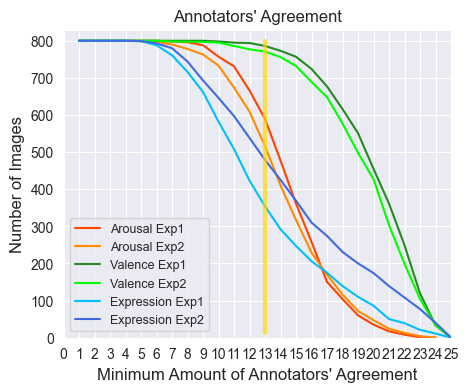

In [ ]:

# ff11acdf['cumsum_r'] = ff11acdf['counts'].sum() - ff11acdf['counts'].cumsum()
# ff22acdf['cumsum_r'] = ff22acdf['counts'].sum() - ff22acdf['counts'].cumsum()
# ff11vcdf['cumsum_r'] = ff11vcdf['counts'].sum() - ff11vcdf['counts'].cumsum()
# ff22vcdf['cumsum_r'] = ff22vcdf['counts'].sum() - ff22vcdf['counts'].cumsum()
# ff11ecdf['cumsum_r'] = ff11ecdf['counts'].sum() - ff11ecdf['counts'].cumsum()
# ff22ecdf['cumsum_r'] = ff22ecdf['counts'].sum() - ff22ecdf['counts'].cumsum()

import seaborn as sns
import numpy as np

# g = sns.regplot( data=ff22a, x='index1',y='scorePM',color='darkorange',scatter_kws={'s':0.01}, scatter=True, label ='Arousal2')

sns.set_style("darkgrid")
plt.figure(figsize=(5,4))
ss = 2
oo = 2

# g = sns.lineplot( data=ff11acdf, x=ff11acdf.agree, y='cumsum_r', color='orangered', label ='Arousal Exp1',)


g = sns.lineplot( data=ff11acdf, x=ff11acdf.agree ,y='cumsum_r', color='orangered', label ='Arousal Exp1')
g = sns.lineplot( data=ff22acdf, x=ff22acdf.agree ,y='cumsum_r', color='darkorange', label ='Arousal Exp2')

g = sns.lineplot( data=ff11vcdf, x=ff11vcdf.agree ,y='cumsum_r', color='forestgreen', label ='Valence Exp1')
g = sns.lineplot( data=ff22vcdf, x=ff22vcdf.agree ,y='cumsum_r', color='lime', label ='Valence Exp2')

g = sns.lineplot( data=ff11ecdf, x=ff11ecdf.agree ,y='cumsum_r', color='deepskyblue', label ='Expression Exp1' )
g = sns.lineplot( data=ff22ecdf, x=ff22ecdf.agree ,y='cumsum_r', color='royalblue', label ='Expression Exp2')


g.set_xticks(range(0,26)) 
# g.set_xticks(range(0,26)) 
g.plot([13,13],[800,13], 'gold', linewidth = 3, marker ='None', alpha=0.7)

plt.xlim(0,25)
plt.ylim(0,830)



g.set_title("Annotators' Agreement",fontsize=12)
g.set_ylabel("Number of Images",fontsize=12)
g.set_xlabel("Minimum Amount of Annotators' Agreement",fontsize=12)

# g.set(title='Number of Majority Vote', xlabel='Images' , ylabel='Number of Annotators')
# handles, labels = g.get_legend_handles_labels()
# n = 6
# fig.legend(handles=[(h1, h2) for h1, h2 in zip(handles[:n], handles[n:])],
#            labels=labels[n:],
#            fontsize=10)
# slice the appropriate section of l and h to include in the legend
g.legend( fontsize=9, markerscale=4)
# g.show()
# sns.figure(figsize=(5,5))



In [ ]:
# arousal-valence space

In [ ]:
AROUSAL_PATH = r'../aaa/aaa.csv' 
VALENCE_PATH = r'../vvv/vvv.csv'

HUMAN_PATH = r'../hhh/hhh.csv'
MODEL_PATH = r'../mmm/mmm.csv'

In [ ]:
import pandas as pd

# X-AXIS - Model,  AROUSAL
momo1 = pd.read_csv(ft_aro, delimiter = ',')

# Y-AXIS - human,  Valence
huhu = pd.read_csv(ft_val, delimiter = ',')

aroval = 'Arousal and Valence'
# aroval = 'Valence'
# aroval = 'Arousal'


model_name = 'ResNet50_FT'
# model_name = 'ResNet50_CL'
# model_name = 'ResNet50_Base'
# model_name = 'AFEW'
# model_name = 'VGAF'
# model_name = 'B2'
# model_name = 'Emonet_1600'
# model_name = 'Human'
# model_name = 'AffectNet'


In [ ]:
huhu

,image,org_exp,arousal,valence,100020,12418,12466,13486,13,15024,...,35,4188,44,58,5,67,74,85,92,mean
0,D:/img/train/happiness/737db2483489148d783ef27...,happiness,-0.055556,0.785714,0.175544,0.163237,0.197942,0.184924,0.169462,0.210778,...,0.129571,0.164050,0.172276,0.138455,0.201258,0.169103,0.121142,0.190600,0.178153,0.172022
1,D:/img/train/neutral/c4db2f9b7e4b422d14b6e038f...,neutral,0.004313,-0.017253,-0.141690,-0.130524,-0.145411,-0.162668,-0.142299,-0.165109,...,-0.172954,-0.150397,-0.139213,-0.134203,-0.131849,-0.175397,-0.213793,-0.104549,-0.136775,-0.147530
2,D:/img/train/neutral/21772b68dc8c2a11678c8739e...,neutral,0.007937,0.174603,-0.171176,-0.174072,-0.207900,-0.173561,-0.165762,-0.175779,...,-0.132355,-0.169134,-0.141242,-0.199855,-0.187389,-0.165412,-0.186934,-0.166885,-0.170765,-0.172944
3,D:/img/train/happiness/06e9ae8d3b240eb68fa6053...,happiness,0.038890,0.153401,0.252262,0.317048,0.254193,0.256449,0.229841,0.237271,...,0.258777,0.231635,0.282283,0.199504,0.286623,0.292680,0.178751,0.244969,0.294658,0.255235
4,D:/img/train/anger/f675c6a88cdef99a6d8b0261741...,anger,0.547619,-0.341270,-0.147468,-0.155822,-0.147875,-0.199957,-0.157372,-0.189645,...,-0.228678,-0.132696,-0.115689,-0.145790,-0.159980,-0.138985,-0.104088,-0.169478,-0.149891,-0.157932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286047,D:/img/train/sadness/6f32a21c80cd0ee3368737782...,sadness,-0.206349,-0.468254,-0.306283,-0.286396,-0.280173,-0.247388,-0.284881,-0.254479,...,-0.344711,-0.308346,-0.247294,-0.296400,-0.304775,-0.319119,-0.348160,-0.319003,-0.304845,-0.300433
286048,D:/img/train/neutral/66c1886c5a0d828f175383c09...,neutral,0.142340,-0.056073,-0.338054,-0.300315,-0.316582,-0.332626,-0.282808,-0.347912,...,-0.321627,-0.317103,-0.279006,-0.306545,-0.303703,-0.292773,-0.351987,-0.323779,-0.295604,-0.315282
286049,D:/img/train/sadness/65e2c4fe91780f417c0edf3c7...,sadness,-0.249501,-0.662960,-0.232513,-0.223113,-0.203363,-0.261185,-0.240705,-0.250508,...,-0.209611,-0.230901,-0.208751,-0.227825,-0.239354,-0.219824,-0.214446,-0.266205,-0.239855,-0.231688
286050,D:/img/train/sadness/a0077b9ae7ab3fd9241dd0775...,sadness,-0.380952,-0.833333,0.357530,0.410760,0.330285,0.370396,0.359390,0.392112,...,0.409203,0.399472,0.395172,0.372646,0.450492,0.363101,0.320478,0.351360,0.391089,0.382916


In [ ]:
momo1

,image,org_exp,arousal,valence,1041,118,13,1969,28,353,...,44,466,58,5,67,702,74,85,92,mean
0,D:/img/train/happiness/737db2483489148d783ef27...,happiness,-0.055556,0.785714,-0.348795,-0.405292,-0.449086,-0.351783,-0.420963,-0.373494,...,-0.566454,-0.334180,-0.376970,-0.387783,-0.320608,-0.351220,-0.330575,-0.352473,-0.411906,-0.379620
1,D:/img/train/neutral/c4db2f9b7e4b422d14b6e038f...,neutral,0.004313,-0.017253,-0.370923,-0.352067,-0.339565,-0.263967,-0.421672,-0.379223,...,-0.352252,-0.275238,-0.264439,-0.314287,-0.329579,-0.316694,-0.305849,-0.298309,-0.223910,-0.314884
2,D:/img/train/neutral/21772b68dc8c2a11678c8739e...,neutral,0.007937,0.174603,-0.044355,0.271159,0.220917,0.120852,-0.099377,0.075882,...,0.159976,-0.118729,0.107662,0.110398,0.095608,0.138091,0.180544,-0.036150,0.152595,0.081024
3,D:/img/train/happiness/06e9ae8d3b240eb68fa6053...,happiness,0.038890,0.153401,-0.262802,-0.185740,-0.214602,-0.212660,-0.187513,-0.188107,...,-0.281119,-0.178477,-0.218041,-0.231361,-0.179975,-0.189913,-0.151041,-0.174183,-0.180017,-0.199215
4,D:/img/train/anger/f675c6a88cdef99a6d8b0261741...,anger,0.547619,-0.341270,0.076978,0.032437,0.002171,0.064580,-0.105765,0.042218,...,-0.002494,0.105158,0.081332,0.033729,0.070114,0.081292,0.069287,0.065031,0.067180,0.047599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286047,D:/img/train/sadness/6f32a21c80cd0ee3368737782...,sadness,-0.206349,-0.468254,-0.244618,-0.074540,-0.088279,-0.073802,-0.186923,-0.080723,...,-0.116186,-0.273927,-0.059069,-0.135015,-0.085460,-0.187779,-0.078073,-0.161873,-0.103371,-0.121446
286048,D:/img/train/neutral/66c1886c5a0d828f175383c09...,neutral,0.142340,-0.056073,0.069764,0.158249,0.152302,0.177674,-0.094215,0.224196,...,0.158444,-0.003192,0.185655,0.017051,0.174056,0.063181,0.030508,-0.066187,0.166832,0.093411
286049,D:/img/train/sadness/65e2c4fe91780f417c0edf3c7...,sadness,-0.249501,-0.662960,-0.180744,-0.239867,-0.318422,-0.222284,-0.138618,-0.098570,...,-0.188774,-0.185833,-0.210277,-0.123405,-0.181757,-0.206133,-0.174757,-0.213469,-0.293997,-0.197408
286050,D:/img/train/sadness/a0077b9ae7ab3fd9241dd0775...,sadness,-0.380952,-0.833333,-0.158000,-0.061267,-0.036701,-0.129673,-0.175517,-0.103482,...,-0.068466,-0.220365,-0.093297,-0.158545,-0.179344,-0.166961,-0.160690,-0.203722,0.004109,-0.132388


In [ ]:
# Mean of 17 seeds, 25 humans, 7 seeds

import numpy as np
aa = 4
bb = 21
cc = bb-aa


huhu['mean'] = huhu.iloc[:,aa:bb].mean(axis=1)
huhu['std'] = huhu.iloc[:,aa:bb].std(axis = 1, skipna = True)
huhu['confidence'] = 0.99 * huhu['std'] /np.sqrt(cc)

# model_name = 'B2'

huhu.iloc[:,aa:bb]

,100020,12418,12466,13486,13,15024,28,3416,35,4188,44,58,5,67,74,85,92
0,0.175544,0.163237,0.197942,0.184924,0.169462,0.210778,0.198797,0.159080,0.129571,0.164050,0.172276,0.138455,0.201258,0.169103,0.121142,0.190600,0.178153
10,-0.619088,-0.677076,-0.569919,-0.741091,-0.668174,-0.672182,-0.721646,-0.684854,-0.779503,-0.629179,-0.608620,-0.601782,-0.651632,-0.573771,-0.545310,-0.749208,-0.620864
20,-0.062373,-0.132946,-0.061374,-0.137312,-0.004029,-0.143831,-0.111324,-0.100159,-0.010314,0.025761,-0.154979,-0.007578,-0.016996,-0.058619,0.099064,-0.224334,-0.019253
30,-0.273016,-0.319079,-0.350733,-0.303925,-0.310790,-0.272377,-0.195959,-0.295912,-0.259815,-0.305593,-0.231037,-0.292422,-0.303071,-0.248862,-0.225632,-0.279637,-0.217474
40,-0.226260,-0.210737,-0.237904,-0.228746,-0.242075,-0.239096,-0.275617,-0.282979,-0.265935,-0.237453,-0.224255,-0.207209,-0.212598,-0.294682,-0.263958,-0.238133,-0.229148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286010,-0.105799,-0.107654,-0.090338,-0.071586,-0.132021,-0.119750,-0.106951,-0.083733,-0.093421,-0.118164,-0.090438,-0.107189,-0.093647,-0.057870,-0.138979,-0.071804,-0.076759
286020,0.396019,0.441142,0.349117,0.461112,0.407832,0.437573,0.383940,0.439772,0.379248,0.358973,0.424687,0.363606,0.513708,0.376489,0.282994,0.385374,0.409258
286030,0.343817,0.416950,0.309467,0.344567,0.388513,0.387633,0.423107,0.379124,0.389473,0.389579,0.389645,0.375421,0.453482,0.395730,0.342837,0.345555,0.405207
286040,-0.122702,-0.098698,-0.144234,-0.125570,-0.117353,-0.116668,-0.105070,-0.114957,-0.123655,-0.158272,-0.146625,-0.138291,-0.130991,-0.110184,-0.225997,-0.105925,-0.107080


In [ ]:
# Mean of 17 seeds, 25 humans, 7 seeds

# import numpy as np

aa = 4
bb = 21

cc = bb-aa


momo1['mean'] = momo1.iloc[:,aa:bb].mean(axis=1)
momo1['std'] = momo1.iloc[:,aa:bb].std(axis = 1, skipna = True)
momo1['confidence'] = 0.99 * momo1['std'] /np.sqrt(cc)


momo1.iloc[:,aa:bb]

,1041,118,13,1969,28,353,35,420,44,466,58,5,67,702,74,85,92
0,-0.348795,-0.405292,-0.449086,-0.351783,-0.420963,-0.373494,-0.326676,-0.345278,-0.566454,-0.334180,-0.376970,-0.387783,-0.320608,-0.351220,-0.330575,-0.352473,-0.411906
10,0.585557,0.531944,0.691942,0.805581,0.595248,0.628300,0.535788,0.589002,0.554702,0.619662,0.609192,0.554552,0.555548,0.612172,0.538872,0.596176,0.473456
20,0.020637,0.099642,0.035325,0.033591,0.001103,0.013637,0.006577,0.038383,0.187182,0.108413,0.031083,0.164763,0.089736,0.013780,0.003355,0.010707,-0.010320
30,0.458549,0.428014,0.375624,0.308375,0.192606,0.391416,0.314384,0.299651,0.341690,0.323406,0.375213,0.375426,0.343915,0.277422,0.385880,0.300873,0.490153
40,-0.190085,-0.234674,-0.237836,-0.218856,-0.178810,-0.115473,-0.200765,-0.233524,-0.213637,-0.244664,-0.261027,-0.121101,-0.086476,-0.246674,-0.220035,-0.272261,-0.309103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286010,-0.347818,-0.363381,-0.412724,-0.318294,-0.284834,-0.321926,-0.302851,-0.286512,-0.311459,-0.280463,-0.336084,-0.314170,-0.241285,-0.313356,-0.332453,-0.312069,-0.442444
286020,0.059050,0.074898,0.073230,0.077063,0.086615,0.056063,0.081808,0.073428,0.107735,0.049656,0.061493,0.024563,0.085536,0.042655,0.083243,0.077420,0.092003
286030,0.222351,0.184306,0.081873,0.140937,0.125038,0.207275,0.147263,0.153167,0.095833,0.162634,0.140587,0.168557,0.172174,0.147120,0.104451,0.160682,0.107823
286040,-0.440393,-0.465194,-0.409762,-0.367429,-0.364581,-0.324682,-0.341910,-0.401645,-0.428628,-0.347653,-0.378904,-0.409020,-0.378730,-0.399385,-0.380462,-0.367432,-0.430500


In [ ]:
huhu

,image,org_exp,arousal,valence,100020,12418,12466,13486,13,15024,...,5,67,74,85,92,mean,std,confidence,max_exp,colors
0,D:/img/train/happiness/737db2483489148d783ef27...,happiness,-0.055556,0.785714,0.175544,0.163237,0.197942,0.184924,0.169462,0.210778,...,0.201258,0.169103,0.121142,0.190600,0.178153,0.172022,0.025184,0.006047,anger,#2ca02c
1,D:/img/train/anger/5c9bfce9f17bc70dc47c8199dcc...,anger,0.817460,-0.373016,-0.619088,-0.677076,-0.569919,-0.741091,-0.668174,-0.672182,...,-0.651632,-0.573771,-0.545310,-0.749208,-0.620864,-0.653759,0.067099,0.016111,anger,#1f77b4
2,D:/img/train/happiness/3816b9dbbbe5bbccb96243b...,happiness,0.328751,0.777047,-0.062373,-0.132946,-0.061374,-0.137312,-0.004029,-0.143831,...,-0.016996,-0.058619,0.099064,-0.224334,-0.019253,-0.065917,0.080050,0.019221,disgust,#2ca02c
3,D:/img/train/surprise/3f7842da7998ba4b5f219f39...,surprise,0.527994,0.323770,-0.273016,-0.319079,-0.350733,-0.303925,-0.310790,-0.272377,...,-0.303071,-0.248862,-0.225632,-0.279637,-0.217474,-0.275608,0.041176,0.009887,anger,#ff9896
4,D:/img/train/neutral/7da0ce591d58109699d4f64ba...,neutral,0.007937,-0.015873,-0.226260,-0.210737,-0.237904,-0.228746,-0.242075,-0.239096,...,-0.212598,-0.294682,-0.263958,-0.238133,-0.229148,-0.242164,0.025807,0.006196,anger,#98df8a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28601,D:/img/train/happiness/ea88b93701387d1d9ff46cd...,happiness,0.363618,0.782028,-0.105799,-0.107654,-0.090338,-0.071586,-0.132021,-0.119750,...,-0.093647,-0.057870,-0.138979,-0.071804,-0.076759,-0.098006,0.022136,0.005315,surprise,#2ca02c
28602,D:/img/train/anger/9a6e4991f5bb528fb61c9e003a3...,anger,0.521912,-0.211353,0.396019,0.441142,0.349117,0.461112,0.407832,0.437573,...,0.513708,0.376489,0.282994,0.385374,0.409258,0.400638,0.051756,0.012427,happiness,#1f77b4
28603,D:/img/train/happiness/9cb2edb110f38e0efc0ff69...,happiness,0.301932,0.862664,0.343817,0.416950,0.309467,0.344567,0.388513,0.387633,...,0.453482,0.395730,0.342837,0.345555,0.405207,0.381183,0.035370,0.008493,surprise,#2ca02c
28604,D:/img/train/happiness/b57b254a8ee0f1e0fd8d8d0...,happiness,0.172255,0.815342,-0.122702,-0.098698,-0.144234,-0.125570,-0.117353,-0.116668,...,-0.130991,-0.110184,-0.225997,-0.105925,-0.107080,-0.128957,0.029918,0.007184,surprise,#2ca02c


In [ ]:
# ADD MAX Expression VOte , AffectNet Expression to color

# huhuhu = pd.read_csv(r'D:\SAVE\Winter\FERPlus-master\FERPlus-master_NEW\finetune\modell\01_every_gen\resnet_base_7seed_exp_260000.csv', delimiter=',')

huhuhu = pd.read_csv(r'D:\SAVE\Winter\FERPlus-master\FERPlus-master_NEW\finetune\modell\01_every_gen\resnet_ft_17seed_exp_260000.csv', delimiter=',')


huhu = pd.merge(huhu, huhuhu[['image', 'max_exp']] , on='image', how = 'left')
huhu

,image,org_exp,arousal,valence,100020,12418,12466,13486,13,15024,...,58,5,67,74,85,92,mean,std,confidence,max_exp
0,D:/img/train/happiness/737db2483489148d783ef27...,happiness,-0.055556,0.785714,0.175544,0.163237,0.197942,0.184924,0.169462,0.210778,...,0.138455,0.201258,0.169103,0.121142,0.190600,0.178153,0.172022,0.025184,0.006047,anger
1,D:/img/train/anger/5c9bfce9f17bc70dc47c8199dcc...,anger,0.817460,-0.373016,-0.619088,-0.677076,-0.569919,-0.741091,-0.668174,-0.672182,...,-0.601782,-0.651632,-0.573771,-0.545310,-0.749208,-0.620864,-0.653759,0.067099,0.016111,anger
2,D:/img/train/happiness/3816b9dbbbe5bbccb96243b...,happiness,0.328751,0.777047,-0.062373,-0.132946,-0.061374,-0.137312,-0.004029,-0.143831,...,-0.007578,-0.016996,-0.058619,0.099064,-0.224334,-0.019253,-0.065917,0.080050,0.019221,disgust
3,D:/img/train/surprise/3f7842da7998ba4b5f219f39...,surprise,0.527994,0.323770,-0.273016,-0.319079,-0.350733,-0.303925,-0.310790,-0.272377,...,-0.292422,-0.303071,-0.248862,-0.225632,-0.279637,-0.217474,-0.275608,0.041176,0.009887,anger
4,D:/img/train/neutral/7da0ce591d58109699d4f64ba...,neutral,0.007937,-0.015873,-0.226260,-0.210737,-0.237904,-0.228746,-0.242075,-0.239096,...,-0.207209,-0.212598,-0.294682,-0.263958,-0.238133,-0.229148,-0.242164,0.025807,0.006196,anger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28601,D:/img/train/happiness/ea88b93701387d1d9ff46cd...,happiness,0.363618,0.782028,-0.105799,-0.107654,-0.090338,-0.071586,-0.132021,-0.119750,...,-0.107189,-0.093647,-0.057870,-0.138979,-0.071804,-0.076759,-0.098006,0.022136,0.005315,surprise
28602,D:/img/train/anger/9a6e4991f5bb528fb61c9e003a3...,anger,0.521912,-0.211353,0.396019,0.441142,0.349117,0.461112,0.407832,0.437573,...,0.363606,0.513708,0.376489,0.282994,0.385374,0.409258,0.400638,0.051756,0.012427,happiness
28603,D:/img/train/happiness/9cb2edb110f38e0efc0ff69...,happiness,0.301932,0.862664,0.343817,0.416950,0.309467,0.344567,0.388513,0.387633,...,0.375421,0.453482,0.395730,0.342837,0.345555,0.405207,0.381183,0.035370,0.008493,surprise
28604,D:/img/train/happiness/b57b254a8ee0f1e0fd8d8d0...,happiness,0.172255,0.815342,-0.122702,-0.098698,-0.144234,-0.125570,-0.117353,-0.116668,...,-0.138291,-0.130991,-0.110184,-0.225997,-0.105925,-0.107080,-0.128957,0.029918,0.007184,surprise


In [ ]:
# color by original AffectNet expression
 
codes = {
    "anger":'#1f77b4',
    "contempt":'#aec7e8',
    "disgust":'#ff7f0e',
    "fear":'#ffbb78',
    "happiness":'#2ca02c',
    "neutral":'#98df8a',
    "sadness":'#d62728',
    "surprise":'#ff9896' 
}
# AFF color
huhu['colors'] = huhu['org_exp'].map(codes)
huhu


,image,org_exp,arousal,valence,100020,12418,12466,13486,13,15024,...,5,67,74,85,92,mean,std,confidence,max_exp,colors
0,D:/img/train/happiness/737db2483489148d783ef27...,happiness,-0.055556,0.785714,0.175544,0.163237,0.197942,0.184924,0.169462,0.210778,...,0.201258,0.169103,0.121142,0.190600,0.178153,0.172022,0.025184,0.006047,anger,#2ca02c
1,D:/img/train/anger/5c9bfce9f17bc70dc47c8199dcc...,anger,0.817460,-0.373016,-0.619088,-0.677076,-0.569919,-0.741091,-0.668174,-0.672182,...,-0.651632,-0.573771,-0.545310,-0.749208,-0.620864,-0.653759,0.067099,0.016111,anger,#1f77b4
2,D:/img/train/happiness/3816b9dbbbe5bbccb96243b...,happiness,0.328751,0.777047,-0.062373,-0.132946,-0.061374,-0.137312,-0.004029,-0.143831,...,-0.016996,-0.058619,0.099064,-0.224334,-0.019253,-0.065917,0.080050,0.019221,disgust,#2ca02c
3,D:/img/train/surprise/3f7842da7998ba4b5f219f39...,surprise,0.527994,0.323770,-0.273016,-0.319079,-0.350733,-0.303925,-0.310790,-0.272377,...,-0.303071,-0.248862,-0.225632,-0.279637,-0.217474,-0.275608,0.041176,0.009887,anger,#ff9896
4,D:/img/train/neutral/7da0ce591d58109699d4f64ba...,neutral,0.007937,-0.015873,-0.226260,-0.210737,-0.237904,-0.228746,-0.242075,-0.239096,...,-0.212598,-0.294682,-0.263958,-0.238133,-0.229148,-0.242164,0.025807,0.006196,anger,#98df8a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28601,D:/img/train/happiness/ea88b93701387d1d9ff46cd...,happiness,0.363618,0.782028,-0.105799,-0.107654,-0.090338,-0.071586,-0.132021,-0.119750,...,-0.093647,-0.057870,-0.138979,-0.071804,-0.076759,-0.098006,0.022136,0.005315,surprise,#2ca02c
28602,D:/img/train/anger/9a6e4991f5bb528fb61c9e003a3...,anger,0.521912,-0.211353,0.396019,0.441142,0.349117,0.461112,0.407832,0.437573,...,0.513708,0.376489,0.282994,0.385374,0.409258,0.400638,0.051756,0.012427,happiness,#1f77b4
28603,D:/img/train/happiness/9cb2edb110f38e0efc0ff69...,happiness,0.301932,0.862664,0.343817,0.416950,0.309467,0.344567,0.388513,0.387633,...,0.453482,0.395730,0.342837,0.345555,0.405207,0.381183,0.035370,0.008493,surprise,#2ca02c
28604,D:/img/train/happiness/b57b254a8ee0f1e0fd8d8d0...,happiness,0.172255,0.815342,-0.122702,-0.098698,-0.144234,-0.125570,-0.117353,-0.116668,...,-0.130991,-0.110184,-0.225997,-0.105925,-0.107080,-0.128957,0.029918,0.007184,surprise,#2ca02c


In [ ]:
# color by max vote expression AffectNet

codes = {
    "anger":'#1f77b4',
    "contempt":'#aec7e8',
    "disgust":'#ff7f0e',
    "fear":'#ffbb78',
    "happiness":'#2ca02c',
    "neutral":'#98df8a',
    "sadness":'#d62728',
    "surprise":'#ff9896' 
}


# Max_color
huhu['max_color'] = huhu['max_exp'].map(codes)
huhu


,image,org_exp,arousal,valence,100020,12418,12466,13486,13,15024,...,67,74,85,92,mean,std,confidence,max_exp,colors,max_color
0,D:/img/train/happiness/737db2483489148d783ef27...,happiness,-0.055556,0.785714,0.175544,0.163237,0.197942,0.184924,0.169462,0.210778,...,0.169103,0.121142,0.190600,0.178153,0.172022,0.025184,0.006047,anger,#2ca02c,#1f77b4
1,D:/img/train/anger/5c9bfce9f17bc70dc47c8199dcc...,anger,0.817460,-0.373016,-0.619088,-0.677076,-0.569919,-0.741091,-0.668174,-0.672182,...,-0.573771,-0.545310,-0.749208,-0.620864,-0.653759,0.067099,0.016111,anger,#1f77b4,#1f77b4
2,D:/img/train/happiness/3816b9dbbbe5bbccb96243b...,happiness,0.328751,0.777047,-0.062373,-0.132946,-0.061374,-0.137312,-0.004029,-0.143831,...,-0.058619,0.099064,-0.224334,-0.019253,-0.065917,0.080050,0.019221,disgust,#2ca02c,#ff7f0e
3,D:/img/train/surprise/3f7842da7998ba4b5f219f39...,surprise,0.527994,0.323770,-0.273016,-0.319079,-0.350733,-0.303925,-0.310790,-0.272377,...,-0.248862,-0.225632,-0.279637,-0.217474,-0.275608,0.041176,0.009887,anger,#ff9896,#1f77b4
4,D:/img/train/neutral/7da0ce591d58109699d4f64ba...,neutral,0.007937,-0.015873,-0.226260,-0.210737,-0.237904,-0.228746,-0.242075,-0.239096,...,-0.294682,-0.263958,-0.238133,-0.229148,-0.242164,0.025807,0.006196,anger,#98df8a,#1f77b4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28601,D:/img/train/happiness/ea88b93701387d1d9ff46cd...,happiness,0.363618,0.782028,-0.105799,-0.107654,-0.090338,-0.071586,-0.132021,-0.119750,...,-0.057870,-0.138979,-0.071804,-0.076759,-0.098006,0.022136,0.005315,surprise,#2ca02c,#ff9896
28602,D:/img/train/anger/9a6e4991f5bb528fb61c9e003a3...,anger,0.521912,-0.211353,0.396019,0.441142,0.349117,0.461112,0.407832,0.437573,...,0.376489,0.282994,0.385374,0.409258,0.400638,0.051756,0.012427,happiness,#1f77b4,#2ca02c
28603,D:/img/train/happiness/9cb2edb110f38e0efc0ff69...,happiness,0.301932,0.862664,0.343817,0.416950,0.309467,0.344567,0.388513,0.387633,...,0.395730,0.342837,0.345555,0.405207,0.381183,0.035370,0.008493,surprise,#2ca02c,#ff9896
28604,D:/img/train/happiness/b57b254a8ee0f1e0fd8d8d0...,happiness,0.172255,0.815342,-0.122702,-0.098698,-0.144234,-0.125570,-0.117353,-0.116668,...,-0.110184,-0.225997,-0.105925,-0.107080,-0.128957,0.029918,0.007184,surprise,#2ca02c,#ff9896


In [ ]:
# every 10th for AffectNet train set
# huhu = huhu.iloc[::10, :]
# momo1 = momo1.iloc[::10, :]

In [ ]:
# 333333 BASE,BASE,AFEW
exaa = 0
exbb = 1600
exp_name = 'Experiment I&II'
image_number = 1600

# # XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# exaa = 0
# exbb = 800
# exp_name = 'Experiment I'
# image_number = 800

# # XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# exaa = 800
# exbb = 1600
# exp_name = 'Experiment II'
# image_number = 800

# # XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX x axis

a1 = momo1['mean'].iloc[exaa:exbb]
b1 = momo1['confidence'].iloc[exaa:exbb]



# huhu - YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY Y axis



c = huhu['mean'].iloc[exaa:exbb]
d = huhu['confidence'].iloc[exaa:exbb]

# MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM Max color
 
e = huhu['max_color'].iloc[exaa:exbb]
f = huhu['max_exp'].iloc[exaa:exbb]
color_name = 'Majority Vote'

AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA affectNet color

# e = huhu['colors'].iloc[exaa:exbb]
# f = huhu['org_exp'].iloc[exaa:exbb]
# color_name = 'AffectNet'


# File image path 
i = momo1['image'].iloc[exaa:exbb]
k = huhu['image'].iloc[exaa:exbb]


In [ ]:
# COLOR CODE 800 set 1 

c_anger =  e[ e =='#1f77b4'].index
c_contempt =  e[ e =='#aec7e8'].index
c_disgust = e[ e == '#ff7f0e'].index
c_fear = e[ e == '#ffbb78'].index
c_happiness = e[ e == '#2ca02c'].index
c_neutral = e[ e == '#98df8a'].index
c_sadness = e[ e == '#d62728'].index
c_surprise = e[ e == '#ff9896'].index


c_anger = c_anger[1] 
c_contempt = c_contempt[1]
c_disgust = c_disgust[1]
c_fear =  c_fear[1]
c_happiness = c_happiness[1]
c_neutral = c_neutral[1]
c_sadness = c_sadness[1]
c_surprise = c_surprise[1]

# color code 800 set2 

# c_anger = c_anger[1] - 800
# c_contempt = c_contempt[1]- 800
# c_disgust = c_disgust[1]- 800
# c_fear =  c_fear[1]- 800
# c_happiness = c_happiness[1]- 800
# c_neutral = c_neutral[1]- 800
# c_sadness = c_sadness[1]- 800
# c_surprise = c_surprise[1]- 800

In [ ]:
# color picker

In [ ]:
c_anger ,c_contempt ,c_disgust ,c_fear ,c_happiness ,c_neutral  ,c_sadness ,c_surprise 

(1, 26, 23, 51, 27, 13, 25, 32)

In [ ]:

# double check

# model_name = 'B2'
# model_name = 'AFEW'
# model_name = 'Emonet_FT'
# model_name = 'Emonet'
# model_name = 'VGAF'
# model_name = 'B0_MTL'
# model_name = 'AffectNet'
# model_name = 'ResNet50 FT'
# model_name = 'ResNet50 Base'
# model_name = 'ResNet CL-SB'
# model_name = 'Human'


In [ ]:
# double check

# aroval = 'Valence'
# aroval = 'Arousal'
aroval = 'Arousal and Valence'

In [ ]:
# double check

# compare_to = "Humans"
compare_to = "AffectNet "


In [ ]:
# exp_name = "Experiment I"
# exp_name = "Experiment II"
exp_name = 'Experiment I&II'


In [ ]:
color_name ,model_name, exp_name, aroval,compare_to

('Resnet50 FT',
 'ResNet50 FT',
 'AffectNet Train Set',
 'Arousal and Valence',
 'AffectNet ')

In [ ]:
color_name = 'AffectNet'
color_name = 'Majority Vote'

In [ ]:
# Only if diagonal analysis
from scipy import stats


# slope, intercept, r_value, p_value, std_err = stats.linregress(a1,c)
# r_value*r_value

0.2546187197042142

In [ ]:
# Title making

# human-model
# title = "Comparison between "+ model_name +" and Humans \n"+aroval+" of 800 Images, "+exp_name+" \n("+color_name+" Color) r²=" +str(r_value*r_value)[:6]

# AROusal VALence
# title = "Comparison between "+ model_name +"\nArousal and Valence of "+str(image_number)+" Images, "+exp_name[0:10]+' '+exp_name[11:]+'\n'+"("+color_name+" Color)"
title = "Comparison between "+ model_name +"\nArousal and Valence of "+'\n' +"AffectNet"+" Images, "+exp_name[0:]+' '+'\n'+"("+color_name+" Color)"

# AROVAL_human
# title = "Comparison between "+ model_name +" and "+compare_to+" \n"+aroval+" of "+str(image_number)+" Images, "+exp_name+" \n("+color_name+" Color) r²=" +str(r_value*r_value)[:6]

# title = "Comparison between "+ model_name +" and Humans \n"+aroval+" of "+str(image_number)+" Images, "+exp_name+" \n("+color_name+" Color) r²=" +str(r_value*r_value)[:6]



tt = title.replace('\n', '')
tt = tt.replace('.', '')
tt = tt.replace(',', '')
tt = tt.replace(" ", '_')
print(title,tt)

Comparison between ResNet50 FT
Arousal and Valence of 
AffectNet Images, AffectNet Train Set 
(Resnet50 FT Color) Comparison_between_ResNet50_FTArousal_and_Valence_of_AffectNet_Images_AffectNet_Train_Set_(Resnet50_FT_Color)


In [ ]:
r_value, p_value

(0.5145541906809503, 7.276711826648686e-109)

In [ ]:
print(tt)

Comparison_between_ResNet50_FTArousal_and_Valence_of_AffectNet_Images_AffectNet_Train_Set_(Resnet50_FT_Color)


In [ ]:
# importing the modules ORG
# importing the modules ORG,cormm
from bokeh.plotting import figure, output_file, show
from bokeh.models import Range1d
from bokeh.models import Legend, LegendItem
from bokeh.core.enums import MarkerType


from bokeh.models import ColorBar, LogColorMapper
from bokeh.models import ColumnDataSource

from bokeh.palettes import Category20
from bokeh.transform import factor_cmap
from bokeh.transform import jitter
from bokeh.plotting import figure, show
from bokeh.sampledata.autompg import autompg
from bokeh.models import Slope

from scipy import stats


    
# the points to be plotted
x1 = a1
y1 = c

  
# SCALE of ellipse
# sca = 1.0/3
sca = 1.0/1.0
    
# width of the ellipse

width1 = b1/sca

# height of the ellipse
height1 = d/sca
  
# angle of the ellipse
angle = 0
  
# fill alpha values
fill_alpha = 0.9
  
  
# line color value
line_color = "black"
line_width = 0.1

slope, intercept, r_value, p_value, std_err = stats.linregress(x1,y1)

# file to save the model

# path11 = 'D:/01_TAC_IMAGE_IEEE/' + model_name + '/' + tt + '2.html'
# path11 = r'D:\01_TAC_IMAGE_IEEE\001_finetune_resnet\BOKEH\new_tac'+ '/jjFIX_scTT_n_'  + tt + '_wh1.html'

# path11 = r'D:\01_TAC_IMAGE_IEEE\NEW IMG' +'/'+ tt + '.html'
path11 = r'D:\01_TAC_IMAGE_IEEE\NEW IMG\heatmap2024' +'/'+ tt + '.html'



output_file(path11)
graph = figure(title = title,width  = 600,height = 677, tooltips=[("img_h","@img_h"),("img_m","@img_m")])


# Axis NAMES
#  -------- 
# human model
# graph.xaxis.axis_label = "Model"
# graph.xaxis.axis_label = "Model Mean"
# graph.yaxis.axis_label = "Human Mean"

# ----------
# # # aroval
graph.xaxis.axis_label = "Arousal Mean"
graph.yaxis.axis_label = "Valence Mean"


# plotting the graph


markers = list(MarkerType)

source = ColumnDataSource(dict(
    x = x1,
    y = y1,
    color = e,
    label = f,
    width = width1,
    height = height1,
    img_h = i,
    img_m = k

))




graph.ellipse( 
    x="x", 
    y="y",
    width="width", 
    height="height",

# no confidence case
    
    # width= 0.05, 
    # height=0.05, 

    angle=0,  
    source = source, 
    
#   
    color = "color",

    fill_alpha = fill_alpha,

    line_color = line_color, 
    line_width=line_width)

# DDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD
# line--- diagonal analysis addition  

# slope = Slope(gradient=slope, y_intercept=intercept,
#               line_color='blue', line_dash='solid', line_width=3)

# graph.add_layout(slope)

# DDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD

pp =   graph.circle(x="x", y="y", size=0, color = "color", line_color = None,  source = source, fill_alpha = 1)



graph.x_range = Range1d(-1.15, 1.15)
graph.y_range = Range1d(-1.15, 1.15)

# graph.x_range = Range1d(-1.0, 1.0)
# graph.y_range = Range1d(-1.0, 1.0)
graph.axis.axis_label_text_font_style = "bold"
graph.xaxis.major_label_text_font_size  = "20px"
graph.yaxis.major_label_text_font_size  = "20px"


# graph.legend.location = 'top_center'
# graph.legend.orientation = "vertical"

# graph.title.align = 'center'
graph.title.text_font_size = "23px"
graph.title.text_align = "center"
# graph.title.offset = 50
graph.title.text_font_style = "normal"


graph.axis.axis_label_text_font_style = 'normal'
graph.axis.axis_label_text_font_size = '23px'

graph.legend.label_text_font_size = '23px'



legend1 = Legend(items=[
    LegendItem(label="anger", renderers=[pp], index=c_anger),
    LegendItem(label="contempt", renderers=[pp], index=c_contempt),
    LegendItem(label="disgust", renderers=[pp], index=c_disgust),
    LegendItem(label="fear", renderers=[pp], index=c_fear)]

    ,orientation="horizontal")

legend2 = Legend(items=[
    LegendItem(label="happiness", renderers=[pp], index=c_happiness),
    LegendItem(label="neutral", renderers=[pp], index=c_neutral),
    LegendItem(label="sadness", renderers=[pp], index=c_sadness),
    LegendItem(label="surprise", renderers=[pp], index=c_surprise),
], orientation="horizontal")


# legend = Legend(items=[
#     LegendItem(label="f", renderers=[pp], index=i) for i, c in enumerate('color')
# ])
# graph.add_layout(legend,'below')

graph.add_layout(legend1,'below')
graph.add_layout(legend2,'below')
graph.legend.location  = "bottom_center"
graph.legend.orientation = "horizontal"

# graph.add_layout( )
graph.legend.label_text_font_size = "21px"

graph.legend.spacing = 0
graph.legend.padding = 0
graph.legend.margin = 0

graph.legend.label_standoff = 1

graph.legend.glyph_height = 30
graph.legend.glyph_width  = 30
graph.legend.border_line_width = 0

# glyph = graph.circle
graph.legend.label_height = 0
graph.legend.spacing = 0





# graph.add_layout(graph.legend1, 'below', )

   
# displaying the model
show(graph)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26860\1838404647.py:227: UserWarning: 
You are attempting to set `plot.legend.label_text_font_size` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  graph.legend.label_text_font_size = '23px'


In [ ]:
# model EXPRESSION CODES. 
idx_to_class={0.0: 'anger', 1.0: 'contempt', 2.0: 'disgust', 3.0: 'fear', 4.0: 'happiness', 5.0: 'neutral', 6.0: 'sadness', 7.0: 'surprise'}
# affectnet
codesA = {0:'neutral',1:'happiness',2:'sadness',3:'surprise',4:'fear',5:'disgust',6:'anger',7:'contempt',8:'none',9:'uncertain',10:'noface'}
#mine
exp = {1:'happiness',2:'sadness',3:'surprise',4:'fear',5:'disgust',6:'anger',7:'contempt',8:'neutral'}
# dan
labels = ['neutral', 'happy', 'sad', 'surprise', 'fear', 'disgust', 'anger', 'contempt']

In [ ]:
# IRRCAC  FLEISS

In [ ]:
model_path = r'../mmmm/mmmm.csv'
newdf = pd.read_csv(model_path , delimiter= ',')

In [ ]:
newdf.columns

Index(['image', 'max_vote', 'max_aff', 'med_aff', 'mean_aff', 'arousal',
       'valence', '1041', '118', '13', '1969', '28', '353', '35', '420', '44',
       '466', '58', '5', '67', '702', '74', '85', '92'],
      dtype='object')

In [ ]:
mf  = newdf[ ['1041', '118', '13', '1969', '28', '353', '35', '420', '44',
       '466', '58', '5', '67', '702', '74', '85', '92'  ]].iloc[   :800   , :]
mf

,1041,118,13,1969,28,353,35,420,44,466,58,5,67,702,74,85,92
800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.463011,-0.474954,-0.424079,NaN,NaN,NaN
801,-0.158344,-0.306734,NaN,NaN,NaN,-0.074169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
802,-0.615985,NaN,-0.592637,NaN,NaN,NaN,-0.559612,NaN,NaN,NaN,-0.524626,NaN,NaN,NaN,-0.490201,NaN,NaN
803,-0.395835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.295652
804,-0.503329,-0.495492,NaN,NaN,-0.501385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,NaN,NaN,NaN,NaN,-0.270731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.068017,NaN
1596,NaN,NaN,NaN,NaN,-0.188928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.054046,NaN,NaN,NaN,NaN
1597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.717587,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
1598,NaN,NaN,NaN,NaN,-0.029487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.046688,NaN


In [ ]:
# AROVAL
from irrCAC.raw import CAC
# pd.options.mode.chained_assignment = None 

cac_4raters_ordinal = CAC(mf, weights='ordinal')
# cac_4raters_ordinal = CAC(mf) 
# cac_4raters_ordinal ,cac_4raters_ordinal.weights_mat

fleiss_ordinal = cac_4raters_ordinal.fleiss()
fleiss_ordinal

{'est': {'coefficient_value': 0.90791,
  'coefficient_name': "Fleiss' kappa",
  'confidence_interval': (0.88068, 0.93513),
  'p_value': 0.0,
  'z': 65.4571,
  'se': 0.01387,
  'pa': 0.98405,
  'pe': 0.82683},
 'weights': array([[1.00000000e+00, 9.99999714e-01, 9.99999143e-01, ..., 1.51143003e-03, 7.55857899e-04, 0.00000000e+00],
        [9.99999714e-01, 1.00000000e+00, 9.99999714e-01, ..., 2.26671639e-03, 1.51143003e-03, 7.55857899e-04],
        [9.99999143e-01, 9.99999714e-01, 1.00000000e+00, ..., 3.02171698e-03, 2.26671639e-03, 1.51143003e-03],
        ...,
        [1.51143003e-03, 2.26671639e-03, 3.02171698e-03, ..., 1.00000000e+00, 9.99999714e-01, 9.99999143e-01],
        [7.55857899e-04, 1.51143003e-03, 2.26671639e-03, ..., 9.99999714e-01, 1.00000000e+00, 9.99999714e-01],
        [0.00000000e+00, 7.55857899e-04, 1.51143003e-03, ..., 9.99999143e-01, 9.99999714e-01, 1.00000000e+00]]),
 'categories': [-1.0,
  -0.8546315,
  -0.80414736,
  -0.7675215,
  -0.75637305,
  -0.7563583,
  -0.

In [ ]:
dfs = pd.crosstab(index=newdf1['original'],columns= [newdf1['pred_max']],margins=False).add_prefix('')
# dfs = pd.crosstab(index=newdf['max_vote'],columns= [newdf['pred_express_str']],margins=False).add_prefix('org2prd_')
# original  ,  max_vote , pred_max_str
dfs

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>pred_max</th>
      <th>anger</th>
      <th>contempt</th>
      <th>disgust</th>
      <th>fear</th>
      <th>happiness</th>
      <th>neutral</th>
      <th>sadness</th>
      <th>surprise</th>
    </tr>
    <tr>
      <th>original</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>anger</th>
      <td>32</td>
      <td>10</td>
      <td>7</td>
      <td>2</td>
      <td>2</td>
      <td>31</td>
      <td>11</td>
      <td>5</td>
    </tr>
    <tr>
      <th>contempt</th>
      <td>9</td>
      <td>61</td>
      <td>1</td>
      <td>0</td>
      <td>14</td>
      <td>12</td>
      <td>0</td>
      <td>3</td>
    </tr>
    <tr>
      <th>disgust</th>
      <td>23</td>
      <td>11</td>
      <td>27</td>
      <td>4</td>
      <td>10</td>
      <td>9</td>
      <td>8</td>
      <td>8</td>
    </tr>
    <tr>
      <th>fear</th>
      <td>15</td>
      <td>4</td>
      <td>7</td>
      <td>28</td>
      <td>0</td>
      <td>11</td>
      <td>10</td>
      <td>25</td>
    </tr>
    <tr>
      <th>happiness</th>
      <td>2</td>
      <td>51</td>
      <td>2</td>
      <td>1</td>
      <td>1</td>
      <td>34</td>
      <td>3</td>
      <td>6</td>
    </tr>
    <tr>
      <th>neutral</th>
      <td>13</td>
      <td>30</td>
      <td>6</td>
      <td>4</td>
      <td>10</td>
      <td>10</td>
      <td>14</td>
      <td>13</td>
    </tr>
    <tr>
      <th>sadness</th>
      <td>21</td>
      <td>5</td>
      <td>5</td>
      <td>7</td>
      <td>1</td>
      <td>35</td>
      <td>20</td>
      <td>6</td>
    </tr>
    <tr>
      <th>surprise</th>
      <td>4</td>
      <td>6</td>
      <td>3</td>
      <td>10</td>
      <td>11</td>
      <td>21</td>
      <td>5</td>
      <td>40</td>
    </tr>
  </tbody>
</table>
</div>

In [10]:
# votevote


import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [20]:
# model_name = '25 Annotator Majority Vote'
# model_name = 'ResNet50 CL-MW'
# model_name = 'ResNet50 CL-VW'
# model_name = 'ResNet50 CL-VW+B'
# model_name = 'ResNet50 Finetune'
# model_name = 'DAN'
model_name = 'ResNet50 Base'
# model_name = 'AFEW'
# model_name = 'B2'
# model_name = 'VGAF'
# model_name = 'Emonet'


y_label ='AffectNet' 

# y_label ='Annotator Majority Vote' 

x = model_name +' Annotation'

title = model_name + ' Prediction \n to '+ y_label +' 800 Images(I)'
# title = model_name + ' Prediction \n to '+ y_label +' 800 Images(II)'
# title = model_name + ' Prediction \n to '+ y_label +' 1600 Images(I&II)'
# title = model_name + ' Prediction \n to '+ y_label +' 800 Images(II)'

In [21]:
# print(title)
tt = title.replace('\n', '')
tt = tt.replace('.', '')
tt = tt.replace(',', '')
tt = tt.replace(" ", '_')
print(tt)

ResNet50_Base_Prediction__to_AffectNet_800_Images(I)


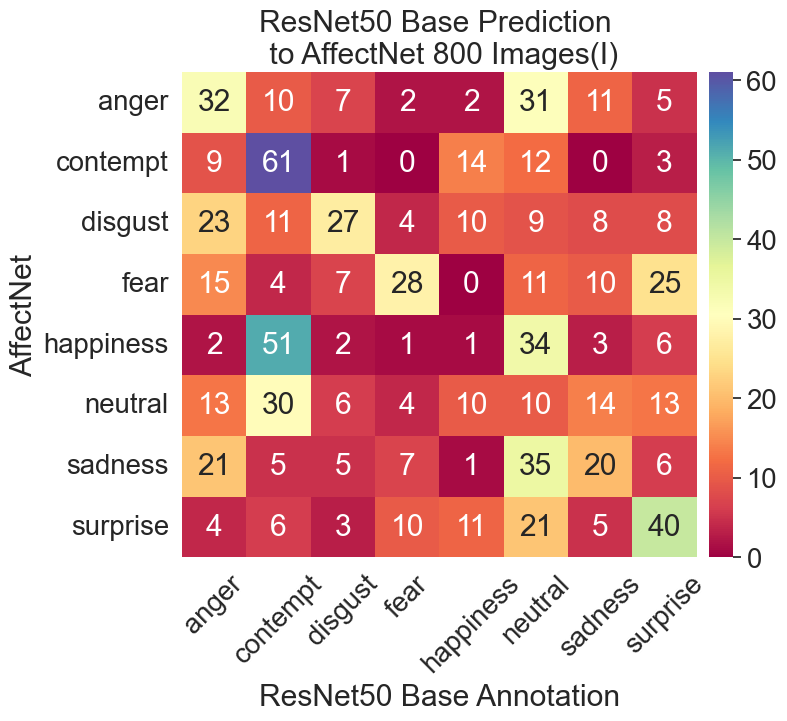

In [22]:
# votevote


import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


col_list = ['anger','contempt','disgust','fear','happiness','neutral','sadness','surprise']

a4_dims = (8,6.3)
# a4_dims = (6,9)

sn.set(font_scale=1.8) 
plt.figure(figsize=a4_dims)

sn.heatmap(dfs, annot=True, cmap='Spectral', yticklabels = col_list, xticklabels=col_list, cbar=True,fmt='g',  cbar_kws={"orientation": "vertical", "pad": 0.02})
# sn.heatmap(df, annot=True, cmap='Spectral', cbar=False,fmt='g')

plt.title(title)



# plt.xlabel('Prediction by ' + 'DAN_affecnet8'  )
# plt.xlabel('Prediction by ' +result[:-14] )
# plt.xlabel('Prediction by B2' )
# plt.xlabel('Prediction by ' + model_n )

# b
# plt.title(' Max Vote to SOTA(EfficientNet B2)')
# y_label = 'AffectNet'
# y_label = '25 Human Majority Vote'

plt.ylabel(y_label)
# plt.ylabel(y_label)
# plt.ylabel('AffectNet')
plt.xlabel(model_name+' Annotation')
# plt.xlabel('ResNet50 Finetuned'+' Annotation')
# plt.xlabel('\n 25People'+' Annotation\n\n')
plt.xticks(rotation=45)

# plt.savefig("D:/winter/OTHER_MODEL/same_code/count_max/" + same + ".png",bbox_inches='tight')

plt.show()


In [ ]:
import pandas as pd
a11 = pd.read_csv(base_seed_exp, delimiter= ',')
# a11 = a11[['image', '05', '13', '28', '35', '44', '58', '67','74', '85', '92']] 
a11

In [213]:
# newdf = emo_clean_exp1 max_int
mf = pd.crosstab(index=a11['expression_int'],columns= [a11['max_int']],margins=False).add_prefix('')
# dfs = pd.crosstab(index=newdf['max_vote'],columns= [newdf['pred_express_str']],margins=False).add_prefix('org2prd_')
mf

max_int,0.0,2.0,3.0,4.0,5.0,6.0,7.0
expression_int,,,,,,,
0,126,3,0,33,159,9,15
1,2,0,0,165,109,1,0
2,36,61,1,67,50,23,12
3,19,1,17,49,42,27,196
4,1,0,0,440,26,3,3
5,0,0,0,19,290,5,5
6,15,3,1,41,122,181,14
7,4,0,0,60,102,5,170


In [ ]:
# When Prediction is 0 on expression 1

In [214]:
idx = 1
new_col = [0, 0, 0, 0, 0, 0, 0, 0] # can be a list, a Series, an array or a scalar   
mf.insert(loc=idx, column='1.0', value=new_col)
mf

max_int,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
expression_int,,,,,,,,
0,126,0,3,0,33,159,9,15
1,2,0,0,0,165,109,1,0
2,36,0,61,1,67,50,23,12
3,19,0,1,17,49,42,27,196
4,1,0,0,0,440,26,3,3
5,0,0,0,0,19,290,5,5
6,15,0,3,1,41,122,181,14
7,4,0,0,0,60,102,5,170


In [ ]:
# IRRCAS COHEN

In [261]:
mf = pd.crosstab(index=df11['max_vote'],columns= [df11['pred_max']],margins=False).add_prefix('')
# dfs = pd.crosstab(index=newdf['max_vote'],columns= [newdf['pred_express_str']],margins=False).add_prefix('org2prd_')
mf

pred_max,anger,contempt,disgust,fear,happiness,neutral,sadness,surprise
max_vote,,,,,,,,
anger,57,2,17,6,0,6,3,9
contempt,4,13,2,0,1,4,4,1
disgust,2,3,42,1,3,1,0,3
fear,1,0,0,19,0,0,1,3
happiness,1,42,5,0,83,3,2,21
neutral,24,55,9,6,5,70,14,23
sadness,5,6,4,5,1,7,69,1
surprise,11,0,4,44,1,3,2,66


In [262]:
# # # EXpression
from irrCAC.table import CAC

cac_4raters_ordinal = CAC(mf)
# # cac_4raters_ordinal.weights_mat
# newdf = emo_clean_exp1
# dfs = pd.crosstab(index=newdf['expression_str'],columns= [newdf['pred_str']],margins=False).add_prefix('')
# # dfs = pd.crosstab(index=newdf['max_vote'],columns= [newdf['pred_express_str']],margins=False).add_prefix('org2prd_')
# # original  ,  max_vote , pred_max_str
# dfs
cac_4raters_ordinal

<irrCAC.table.CAC Subjects: 800, Categories: ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise'], Weights: "identity">

In [263]:
cohen = cac_4raters_ordinal.cohen()
cohen


{'est': {'coefficient_value': 0.45514,
  'coefficient_name': "Cohen's kappa",
  'confidence_interval': (0.41662, 0.49367),
  'p_value': 0.0,
  'z': 23.19054,
  'se': 0.01963,
  'pa': 0.52375,
  'pe': 0.12592},
 'weights': array([[1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.]]),
 'categories': ['anger',
  'contempt',
  'disgust',
  'fear',
  'happiness',
  'neutral',
  'sadness',
  'surprise']}